In [1]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import ast

from sklearn import metrics
from sklearn.utils.fixes import signature
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

In [2]:
# Input files
out_csv = '/Users/cvigilv/Dropbox/2018/Data/CC&D mk. 2/chembl23_GS3_v2.mphase_gt_0.txt.co.gt.out'

In [3]:
# Convert .csv file into pandas dataframe for data processing and cleaning
out_df = pd.read_csv(out_csv)
out_df = out_df.drop(out_df.columns[0], axis=1)
out_df = out_df.drop(out_df.columns[1], axis=1)

def Convert2List(row):
    return ast.literal_eval(row['Similarities'])

out_df['Similarities'] = out_df.apply(Convert2List, axis = 1)
print(out_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999031 entries, 0 to 999030
Data columns (total 8 columns):
Fold            999031 non-null int64
Score           999031 non-null float64
Similarities    999031 non-null object
Source          999031 non-null object
Steps           999031 non-null int64
TP              999031 non-null bool
Target          999031 non-null object
Time elapsed    999031 non-null float64
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 54.3+ MB
None


In [10]:
# Calculate other scores
def Score(row):
    return np.prod(row['Similarities'])

def Score2(row):
    return np.sum(row['Similarities'])

def Score3(row):
    array = np.array([w for w in row['Similarities'] if w != 0])
    return array.prod()**(1.0/len(array))

def Score4(row):
    return 1 / np.sum(row['Similarities'])

def Score5(row):
    return  np.prod(row['Similarities']) * (1 / np.sum(row['Similarities']))

out_df['Score'] = out_df.apply(Score, axis = 1)
out_df['Score 2'] = out_df.apply(Score2, axis = 1)
out_df['Score 3'] = out_df.apply(Score3, axis = 1)
out_df['Score 4'] = out_df.apply(Score4, axis = 1)
out_df['Score 5'] = out_df.apply(Score5, axis = 1)

In [11]:
# Create a bunch of graphs with important data

def ROC(y_pred, y_scores, title, filename):
    plt.figure()
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_pred, y_scores, pos_label=1)
    auc_roc = sklearn.metrics.auc(fpr,tpr)
    plt.plot(fpr, tpr, color='orange', lw=2, label='Area = %0.2f' % (auc_roc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic - {INPUT}'.format(INPUT = title))
    plt.legend(loc="lower right", prop={'size': 10})
    plt.savefig(filename+'.ROC.png' ,dpi = 300)
    plt.close('all')

def PR(y_pred, y_scores, title, filename):
    plt.figure()
    average_precision = average_precision_score(y_pred, y_scores)
    precision, recall, _ = precision_recall_curve(y_pred, y_scores)
    plt.step(recall, precision, color='orange', where='post', label = 'AVG. Precision = %0.2f' % (average_precision))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve - {} '.format(title))
    plt.legend(loc="upper right", prop={'size': 10})
    plt.savefig(filename+'.PR.png',dpi = 300)
    plt.close('all')
    
for t in ['Score', 'Score 2', 'Score 3', 'Score 4', 'Score 5']:
    ROC(out_df['TP'], out_df[out_df['Steps'] > 0][t], t, out_csv+'.'+t)
    PR(out_df['TP'], out_df[out_df['Steps'] > 0][t], t, out_csv+'.'+t)

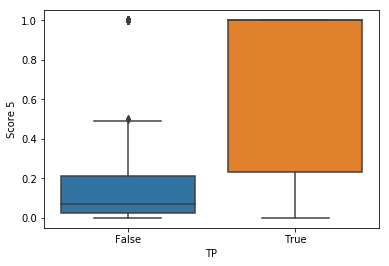

In [12]:
sns.boxplot(y = 'Score 5', x = 'TP', data = out_df)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


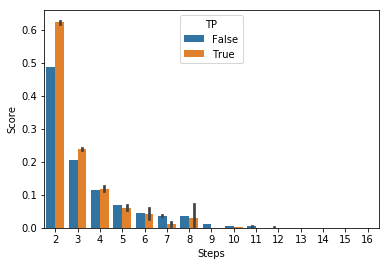

In [13]:
sns.barplot(x = 'Steps', y = 'Score', hue = 'TP', data = out_df)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


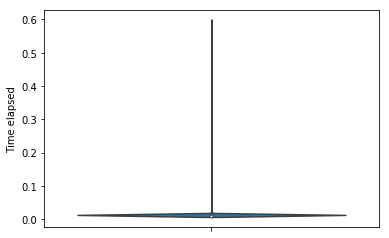

In [14]:
sns.violinplot(y = 'Time elapsed', data = out_df, cut = 0)